In [1]:
ls

P2_Wrangling_Subway_Data/
Problem set 3.ipynb
Project4_Data_Visualization.ipynb
Project4_all_functions.ipynb
Quizs
README.md
Untitled0.ipynb
baseball_stats.csv
hr_by_team_year_sf_la.csv
hr_year.csv
lesson01.ipynb
lesson3_Data_analysis.ipynb
lesson4_visualization.ipynb
loading_wrangling_data_lesson02.ipynb
turnstile_data_master_with_weather (1).csv


In [21]:
from pandas import *
from ggplot import *

def time_to_hour_series(series):
    new_TIME = []
    for i in series:
        hour = abs(int(i.split(':')[0]))
        new_TIME.append(hour)
    return new_TIME

def plot_weather_data(turnstile_weather):
    '''
    You are passed in a dataframe called turnstile_weather. 
    Use turnstile_weather along with ggplot to make a data visualization
    focused on the MTA and weather data we used in assignment #3.  
    You should feel free to implement something that we discussed in class 
    (e.g., scatterplots, line plots, or histograms) or attempt to implement
    something more advanced if you'd like.  

    Here are some suggestions for things to investigate and illustrate:
     * Ridership by time of day or day of week
     * How ridership varies based on Subway station (UNIT)
     * Which stations have more exits or entries at different times of day
       (You can use UNIT as a proxy for subway station.)

    If you'd like to learn more about ggplot and its capabilities, take
    a look at the documentation at:
    https://pypi.python.org/pypi/ggplot/
     
    You can check out:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv
     
    To see all the columns and data points included in the turnstile_weather 
    dataframe. 
     
    However, due to the limitation of our Amazon EC2 server, we are giving you a random
    subset, about 1/3 of the actual data in the turnstile_weather dataframe.
    '''
    ridership_by_time = turnstile_weather[['TIMEn', 'ENTRIESn_hourly']]
    ridership_by_time.is_copy = False
    ridership_by_time['TIMEn']  = pandas.Series(time_to_hour_series(ridership_by_time['TIMEn']), index=ridership_by_time.index)
    
    plot = ggplot(ridership_by_time, aes('TIMEn', 'ENTRIESn_hourly')) + geom_point(color = "red") + ggtitle('Ridership by time') +xlab('Time') + ylab('Entries per hour') + xlim(-1,24)

    return plot


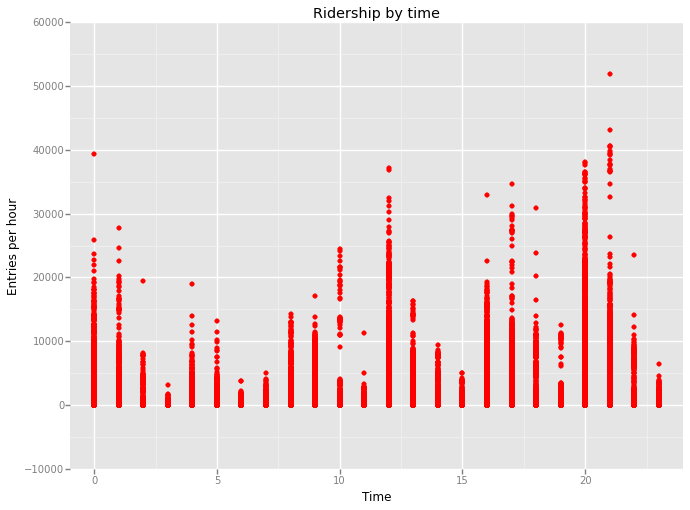

<ggplot: (291497837)>

In [22]:
import pandas
from ggplot import *
%matplotlib inline
turnstile_weather = pandas.read_csv("turnstile_data_master_with_weather (1).csv")
plot_weather_data(turnstile_weather)

In [6]:
ridership_by_time = turnstile_weather[['TIMEn', 'ENTRIESn_hourly']]

In [7]:
def time_to_hour_series(series):
    new_TIME = []
    for i in series:
        hour = abs(int(i.split(':')[0]))
        new_TIME.append(hour)
    return new_TIME

In [15]:
ridership_by_time.loc[:,'new_TIMEn'] = pandas.Series(time_to_hour_series(ridership_by_time['TIMEn']), index=ridership_by_time.index)

In [16]:
ridership_by_time.head()

,TIMEn,ENTRIESn_hourly,new_TIMEn
0,01:00:00,0,1
1,05:00:00,217,5
2,09:00:00,890,9
3,13:00:00,2451,13
4,17:00:00,4400,17


In [24]:
list(turnstile_weather.columns.values)

['Unnamed: 0',
 'UNIT',
 'DATEn',
 'TIMEn',
 'Hour',
 'DESCn',
 'ENTRIESn_hourly',
 'EXITSn_hourly',
 'maxpressurei',
 'maxdewpti',
 'mindewpti',
 'minpressurei',
 'meandewpti',
 'meanpressurei',
 'fog',
 'rain',
 'meanwindspdi',
 'mintempi',
 'meantempi',
 'maxtempi',
 'precipi',
 'thunder']

In [27]:
# add a column transfer date to day of the week
ridership_by_day = turnstile_weather[['DATEn','TIMEn', 'ENTRIESn_hourly']]
ridership_by_day.head()                                   


,DATEn,TIMEn,ENTRIESn_hourly
0,2011-05-01,01:00:00,0
1,2011-05-01,05:00:00,217
2,2011-05-01,09:00:00,890
3,2011-05-01,13:00:00,2451
4,2011-05-01,17:00:00,4400


In [30]:
import datetime as dt
ridership_by_day['DATEn'] = pandas.Series(ridership_by_day['DATEn'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d').weekday()), index=ridership_by_day.index)

/Users/thuy/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [34]:
ridership_by_day.head(20) 

,DATEn,TIMEn,ENTRIESn_hourly
0,6,01:00:00,0
1,6,05:00:00,217
2,6,09:00:00,890
3,6,13:00:00,2451
4,6,17:00:00,4400
5,6,21:00:00,3372
6,6,01:00:00,0
7,6,05:00:00,42
8,6,09:00:00,50
9,6,13:00:00,316


In [36]:
plot1 = ggplot(ridership_by_day, aes('DATEn', 'ENTRIESn_hourly')) + geom_point(color = "blue") + ggtitle('Ridership by day of the week') +xlab('Day') + ylab('Entries per hour')

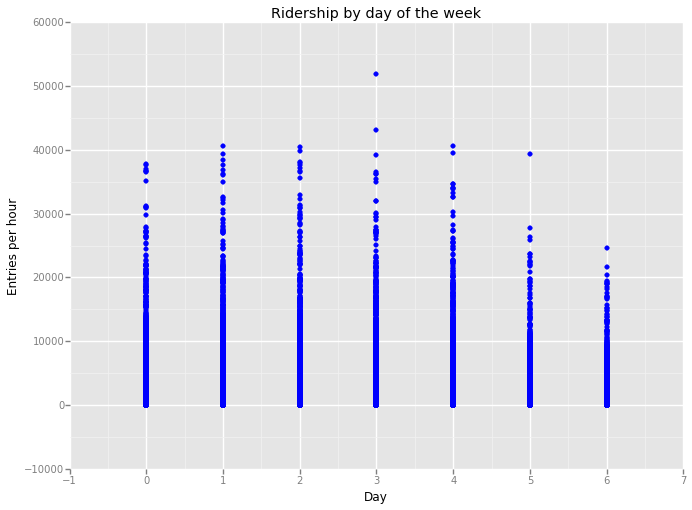

<ggplot: (287515349)>

In [37]:
plot1

In [ ]:
from pandas import *
from ggplot import *
import datetime as dt

def plot_weather_data(turnstile_weather):
    ''' 
    plot_weather_data is passed a dataframe called turnstile_weather. 
    Use turnstile_weather along with ggplot to make another data visualization
    focused on the MTA and weather data we used in Project 3.
    
    Make a type of visualization different than what you did in the previous exercise.
    Try to use the data in a different way (e.g., if you made a lineplot concerning 
    ridership and time of day in exercise #1, maybe look at weather and try to make a 
    histogram in this exercise). Or try to use multiple encodings in your graph if 
    you didn't in the previous exercise.
    
    You should feel free to implement something that we discussed in class 
    (e.g., scatterplots, line plots, or histograms) or attempt to implement
    something more advanced if you'd like.

    Here are some suggestions for things to investigate and illustrate:
     * Ridership by time-of-day or day-of-week
     * How ridership varies by subway station (UNIT)
     * Which stations have more exits or entries at different times of day
       (You can use UNIT as a proxy for subway station.)

    If you'd like to learn more about ggplot and its capabilities, take
    a look at the documentation at:
    https://pypi.python.org/pypi/ggplot/
     
    You can check out the link 
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv
    to see all the columns and data points included in the turnstile_weather 
    dataframe.
     
   However, due to the limitation of our Amazon EC2 server, we are giving you a random
    subset, about 1/3 of the actual data in the turnstile_weather dataframe.
    '''

    ridership_by_day = turnstile_weather[['DATEn','TIMEn', 'ENTRIESn_hourly']]
    ridership_by_day.is_copy = False
    ridership_by_day['DATEn'] = pandas.Series(ridership_by_day['DATEn'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d').weekday()), index=ridership_by_day.index)
    plot = ggplot(ridership_by_day, aes('DATEn', 'ENTRIESn_hourly')) + geom_point(color = "blue") + ggtitle('Ridership by day of the week') +xlab('Day') + ylab('Entries per hour') # your code here
    return plot
